In [1]:
 #pip install --upgrade tensorflow
 #pip install xgboost

In [64]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist
import sklearn
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [2]:
(X_train, y_train), (X_test_final, y_test_final) = fashion_mnist.load_data()

In [3]:
# lets see the distribution of the data 
print("train examples", len(X_train))
print("train outputs", len(y_train))
print("test exmaples", len(X_test_final))
print("test outputs", len(y_test_final))

train examples 60000
train outputs 60000
test exmaples 10000
test outputs 10000


In [4]:
# We notice that the labels are given without explaining which clothes they are supposed to represent - they are represented by numbers. Therefore, we make a list 
# that will store the item names
# instead of 0-9 values
label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
 "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

## Preproccessing

In [5]:
X_train, X_test_final = X_train.reshape(60000, 784), X_test_final.reshape(10000, 784)

In [6]:
X_train = pd.DataFrame(X_train)
y_train = pd.DataFrame(y_train)
X_test_final = pd.DataFrame(X_test_final)
y_test_final = pd.DataFrame(y_test_final)

In [7]:
X_train , X_test , y_train , y_test = train_test_split(X_train, y_train ,test_size = 0.2 , shuffle = True , random_state = 1)

In [8]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
5004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17676,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29485,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36476,0,0,0,0,2,1,0,0,0,0,...,0,0,2,0,18,207,212,104,0,0
45508,0,0,1,0,0,0,2,1,0,0,...,96,81,17,0,0,0,0,0,0,0


## Checking for NaNs

In [9]:
# since we got the dataframe from a numpy array, there is no chance there is a NaN.
# we will show that there aren't NaNs.
# move it upward before the split.

In [10]:
print("X_train NaNs", X_train.isna().sum().sum())
print("y_train NaNs", y_train.isna().sum().sum())
print("X_test NaNs", X_test.isna().sum().sum())
print("y_test NaNs", y_test.isna().sum().sum())

X_train NaNs 0
y_train NaNs 0
X_test NaNs 0
y_test NaNs 0


# Simple models without PCA

In [31]:
#add dummy classifier

### KNN:

In [11]:
y_train = np.ravel(y_train)

In [14]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [15]:
y_pred = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn

0.8533333333333334

### Random forest 

In [16]:
# instantiate the model
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)

# fit the model with data
rand_forest.fit(X_train, y_train)

#make predictions on the testing set (predict for first_test)
y_pred = rand_forest.predict(X_test)

In [17]:
accuracy_rand_forest = metrics.accuracy_score(y_test, y_pred)
accuracy_rand_forest

0.8838333333333334

### Logistic Regression

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=0)
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

In [ ]:
accuracy_log_reg = metrics.accuracy_score(y_test, y_pred)
accuracy_log_reg

# PCA

In [12]:
pca = PCA(n_components = 0.9)
# using pca show to show where to take
#pca = PCA(n_components = 100)

In [13]:
# figure out what is the difference between pca.fit and pca.fit_transform
# not use pca.fit_transform twice
#https://stackoverflow.com/questions/40366175/handle-incompatible-matrices-shapes-in-tf-idf
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
X_test_reduced_final = pca.transform(X_test_final)

In [14]:
print("y shape", y_train.shape)
print("x shape", X_train_reduced.shape)

y shape (48000,)
x shape (48000, 84)


In [15]:
print("number of dimensions", X_train_reduced.shape[1])

number of dimensions 84


In [16]:
# find out why we need to use ravel(gives a warning/error otherwise)
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

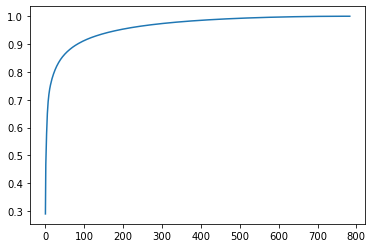

In [17]:
pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.show()

# Simple Models with PCA

In [38]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

In [39]:
grid = GridSearchCV(knn, param_grid, cv = 5, scoring='accuracy', return_train_score=False,verbose=1)

In [40]:
_, X_minor_train , _ , y_minor_train =  train_test_split(X_train.copy(), y_train.copy() ,test_size = 0.1 , shuffle = True , random_state = 1)

In [41]:
grid_search=grid.fit(X_minor_train, y_minor_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [42]:
print(grid_search.best_params_)

{'n_neighbors': 5}


### KNN:

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [44]:
y_pred = knn.predict(X_test_reduced)
accuracy_knn = accuracy_score(y_test, y_pred)
accuracy_knn
# clustering kmeans, ensemble, adaboost, voting
# do without pca first
# ask if we need to split the training data as well

0.86225

### Random Forest

In [46]:
param_grid = { 
    'n_estimators': [200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
}
rand_forest= RandomForestClassifier(n_jobs=-1, random_state=0)
CV_rfc = GridSearchCV(estimator=rand_forest, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_minor_train, y_minor_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 300]})

In [47]:
print(CV_rfc.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 200}


In [59]:
# instantiate the model
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0, criterion = 'gini', 
                                   max_features = 'auto')

# fit the model with data
rand_forest.fit(X_train_reduced, y_train)

#make predictions on the testing set (predict for first_test)
y_pred = rand_forest.predict(X_test_reduced)

In [60]:
accuracy_rand_forest = metrics.accuracy_score(y_test, y_pred)
accuracy_rand_forest
# 200 - 0.868
# 300 - 0.871
# 500 - 0.872

0.8723333333333333

### Logistic Regression

In [63]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)


In [44]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=42)
logistic_regression.fit(X_train_reduced, y_train)
y_pred = logistic_regression.predict(X_test_reduced)

In [45]:
accuracy_log_reg = metrics.accuracy_score(y_test, y_pred)
accuracy_log_reg

0.8410833333333333

In [66]:
svm_model = svm.SVC()
svm_model.fit(X_train_reduced, y_train)

SVC()

In [67]:
y_pred = svm_model.predict(X_test_reduced)

In [68]:
accuracy_svm = metrics.accuracy_score(y_test, y_pred)
accuracy_svm

0.8890833333333333

# Ensembles

### Voting classifier  - Hard Voting

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=0)
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
voting_clf = VotingClassifier(estimators = [('lr', logistic_regression), ('rf', rand_forest), ('kn', knn)], voting = 'hard')

In [ ]:
voting_clf.fit(X_train_reduced, y_train)

In [ ]:
 #for clf in (logistic_regression, rand_forest, knn, voting_clf):
 #   clf.fit(X_train, y_train)
 #   y_pred = clf.predict(X_test_reduced)
 #   print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

In [ ]:
y_pred = voting_clf.predict(X_test_reduced)
voting_score = accuracy_score(y_test, y_pred)
voting_score

Soft Voting

In [ ]:
logistic_regression = LogisticRegression(solver='liblinear', random_state=0)
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
voting_clf = VotingClassifier(estimators = [('lr', logistic_regression), ('rf', rand_forest), ('kn', knn)], voting = 'soft')

In [ ]:
voting_clf.fit(X_train_reduced, y_train)

In [ ]:
y_pred = voting_clf.predict(X_test_reduced)
voting_score = accuracy_score(y_test, y_pred)
voting_score

Bagging

In [ ]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=10000, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train_reduced, y_train)
y_pred = bag_clf.predict(X_test_reduced)

In [ ]:
bagging_score = accuracy_score(y_test, y_pred)
bagging_score
# only with 10,000 samples the bagging can be compared to the other models.
# wuth 1,000 and 100 samples, the score is 0.75+ -> 0.79-

Bagging with random patch method

In [ ]:
# check adeqaute number for max_features and why
# check if  Random Subspaces method pg 224

In [ ]:
bag_clf = BaggingClassifier(
 DecisionTreeClassifier(), n_estimators=500,
 max_samples=10000, max_features= int(X_train_reduced.shape[1] / 2), bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train_reduced, y_train)
y_pred = bag_clf.predict(X_test_reduced)

In [ ]:
bagging_score = accuracy_score(y_test, y_pred)
bagging_score

### Adaboost

In [ ]:
ada_clf = AdaBoostClassifier(
 DecisionTreeClassifier(max_depth=1), n_estimators=200,
 algorithm="SAMME.R", learning_rate=0.5)
ada_clf.fit(X_train_reduced, y_train)

In [ ]:
y_pred = ada_clf.predict(X_test_reduced)

In [ ]:
ada_boost_score = accuracy_score(y_test, y_pred)

In [ ]:
ada_boost_score

In [ ]:
pip install xgboost

In [ ]:
import xgboost
from xgboost import XGBClassifier
xgb=xgboost.XGBClassifier(n_estimators=200,eval_metric='mlogloss')
xgb.fit(X_train_reduced,y_train)
xgb_p=xgb.predict(X_test_reduced)

In [ ]:
xgb_score = accuracy_score(y_test, xgb_p)
xgb_score

In [ ]:
xgb=xgboost.XGBClassifier(n_estimators=200,eval_metric='mlogloss')
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
voting_clf = VotingClassifier(estimators = [('xg', xgb), ('rf', rand_forest), ('kn', knn)], voting = 'soft')

In [ ]:
voting_clf.fit(X_train_reduced, y_train)

In [ ]:
y_pred = voting_clf.predict(X_test_reduced)
voting_score = accuracy_score(y_test, y_pred)
voting_score

In [ ]:
xgb=xgboost.XGBClassifier(n_estimators=200,eval_metric='mlogloss')
rand_forest= RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=0)
knn = KNeighborsClassifier(n_neighbors=5)
voting_clf = VotingClassifier(estimators = [('xg', xgb), ('rf', rand_forest), ('kn', knn)], voting = 'soft')

In [ ]:
y_pred = voting_clf.predict(X_test_final)
voting_score = accuracy_score(y_test, y_pred)
voting_score